## 1.Series数据结构与索引

In [1]:
import pandas as pd
import numpy as np

### Series数据结构

In [2]:
stock_seri = pd.Series([3.5, 7.2, 12.6, 4.7, 8.2],
                       index=["300773", "600751", "300405", "002937", "601615"],
                       name="Stock")
stock_seri

300773     3.5
600751     7.2
300405    12.6
002937     4.7
601615     8.2
Name: Stock, dtype: float64

In [3]:
stock_seri.name

'Stock'

### Series的常用操作

**Series的索引**

In [4]:
stock_seri["300773"]

3.5

In [5]:
stock_seri[["300773", "600751","300405"]]

300773     3.5
600751     7.2
300405    12.6
Name: Stock, dtype: float64

In [6]:
stock_seri[[True, False, False, False, True]]

300773    3.5
601615    8.2
Name: Stock, dtype: float64

In [7]:
stock_seri["300773":"300405"]       # 注意:pandas是左闭右闭的区间

300773     3.5
600751     7.2
300405    12.6
Name: Stock, dtype: float64

**Numpy常用的运算，在Series里也是适用的**

In [8]:
stock_seri[stock_seri > 8]

300405    12.6
601615     8.2
Name: Stock, dtype: float64

In [9]:
stock_seri*2

300773     7.0
600751    14.4
300405    25.2
002937     9.4
601615    16.4
Name: Stock, dtype: float64

In [10]:
np.average(stock_seri)

7.239999999999999

**查看Series数据集中是否有空值**

In [11]:
stock_seri.isnull()

300773    False
600751    False
300405    False
002937    False
601615    False
Name: Stock, dtype: bool

**修改index**

In [12]:
stock_seri.index = ["拉卡拉", "海航科技", "科隆股份", "兴瑞科技", "明阳智能"]

In [13]:
stock_seri["兴瑞科技"] = 6.8

In [14]:
stock_seri

拉卡拉      3.5
海航科技     7.2
科隆股份    12.6
兴瑞科技     6.8
明阳智能     8.2
Name: Stock, dtype: float64

**字典来创建Series**

In [15]:
stock_price_dict = {
    "2012": 1,
    "2013": 3
}
pd.Series(stock_price_dict)

2012    1
2013    3
dtype: int64

## DataFrame数据结构与索引

### DataFrame数据结构

In [16]:
frame0 = pd.DataFrame(np.arange(6).reshape(2, 3),
                      index=[2000, 2001], columns=["A", "B", "C"])
frame0

,A,B,C
2000,0,1,2
2001,3,4,5


In [17]:
# 利用字典格式，生成DataFrame数据结构
data = {"A": [0, 3], "B": [1, 4], "C": [2, 5]}
temp = pd.DataFrame(data, index= [4, 5])
temp

,A,B,C
4,0,1,2
5,3,4,5


In [18]:
temp["A"]

4    0
5    3
Name: A, dtype: int64

**对多列索引，需要以列表的形式传入序列**

In [19]:
temp[["A", "B", "C"]]

,A,B,C
4,0,1,2
5,3,4,5


**筛选A值为0的行**

In [20]:
temp[temp["A"] == 0]

,A,B,C
4,0,1,2


In [21]:
# 乘法运算
temp*2

,A,B,C
4,0,2,4
5,6,8,10


### DataFrame索引

#### loc 标签索引

In [22]:
frame0 = pd.DataFrame(np.arange(6).reshape(2, 3),
                      index=[2000, 2001], columns=["A", "B", "C"])
frame0

,A,B,C
2000,0,1,2
2001,3,4,5


In [23]:
# 选择索引为2000的行
frame0.loc[2000]

A    0
B    1
C    2
Name: 2000, dtype: int32

In [24]:
# 选择“A”列
frame0.loc[:,"A"]

2000    0
2001    3
Name: A, dtype: int32

In [25]:
# 选择索引为2001，BC列的元素
frame0.loc[2001,"B":"C"]

B    4
C    5
Name: 2001, dtype: int32

#### iloc函数

In [26]:
# 通过位置，选择索引为2000的行
frame0.iloc[0]

A    0
B    1
C    2
Name: 2000, dtype: int32

In [27]:
# 通过位置，选择“A”列
frame0.iloc[:,0]

2000    0
2001    3
Name: A, dtype: int32

#### 索引对象初窥

In [28]:
frame0.index[:1]

Int64Index([2000], dtype='int64')

**用reindex的方式，为数据集构造一个新的index对象**

In [29]:
# reindex的方式，会继承原先的索引，如果有新增的索引项，那么会自动填充空值
frame0.reindex([2000,2001,2002])

,A,B,C
2000,0.0,1.0,2.0
2001,3.0,4.0,5.0
2002,NaN,NaN,NaN


**增加fill_value属性，自动填充其他值**

In [30]:
frame0.reindex([2000,2001,2002], fill_value = 20)

,A,B,C
2000,0,1,2
2001,3,4,5
2002,20,20,20


In [31]:
frame0.columns

Index(['A', 'B', 'C'], dtype='object')

#### 修改列名，有2种方法

**方法一：利用rename函数**

In [32]:
frame0.rename(columns={"A": "a","B":"b","C":"c"})

,a,b,c
2000,0,1,2
2001,3,4,5


**方法二：重新指定**

In [33]:
frame0.columns = ["d", "e", "f"]
frame0

,d,e,f
2000,0,1,2
2001,3,4,5


## 读取文件

### Python读取文件

In [34]:
file01 = r"C:\Users\16526\Desktop\电网项目\dataset\chapter 3\3-2 job_chance.csv"
with open(file01, "r", encoding="utf-8") as f:
    lines = f.read()
lines

'岗位,公司,地点,最低工资(万/月),最高工资(万/月)\nphp开发工程师,重庆赶海科技有限公司,重庆,0.6,0.8\njava开发工程师,上海赛可出行科技服务有限公司,南京,1.5,2.5\n测试工程师,朗新科技股份有限公司,无锡,0.6,1\nweb开发工程师,快助（天津）科技有限公司,天津,0.8,1\n销售顾问,上海钢联电子商务股份有限公司,深圳,1,1.5'

In [35]:
with open(file01, "r", encoding="utf-8") as f:
    lines = f.readlines()
content = [line.strip().split(",") for line in lines]
content

[['岗位', '公司', '地点', '最低工资(万/月)', '最高工资(万/月)'],
 ['php开发工程师', '重庆赶海科技有限公司', '重庆', '0.6', '0.8'],
 ['java开发工程师', '上海赛可出行科技服务有限公司', '南京', '1.5', '2.5'],
 ['测试工程师', '朗新科技股份有限公司', '无锡', '0.6', '1'],
 ['web开发工程师', '快助（天津）科技有限公司', '天津', '0.8', '1'],
 ['销售顾问', '上海钢联电子商务股份有限公司', '深圳', '1', '1.5']]

**columns代表列名**

In [36]:
df_job01 = pd.DataFrame(content[1:], columns=content[0])
df_job01

,岗位,公司,地点,最低工资(万/月),最高工资(万/月)
0,php开发工程师,重庆赶海科技有限公司,重庆,0.6,0.8
1,java开发工程师,上海赛可出行科技服务有限公司,南京,1.5,2.5
2,测试工程师,朗新科技股份有限公司,无锡,0.6,1
3,web开发工程师,快助（天津）科技有限公司,天津,0.8,1
4,销售顾问,上海钢联电子商务股份有限公司,深圳,1,1.5


### Pandas读取文件

Pandas提供了多个读取表格型的文本文件，并转化为DataFrame对象的函数，
其中用的最多的2个函数应该是read_csv和read_table。
二者均提供了一个标准的方法，从文件型对象中记载带分隔符的数据，
其中<font color=red>read_csv</font>的默认分隔符为逗号，
<font color=red>read_table</font>的默认分隔符为制表符\t。

#### 常规读取

**read_csv 会自动默认第一行为列名，并根据第一列的特别，默认是否设置为索引**

In [37]:
df_job02 = pd.read_csv(file01, encoding="utf-8")
df_job02

,岗位,公司,地点,最低工资(万/月),最高工资(万/月)
0,php开发工程师,重庆赶海科技有限公司,重庆,0.6,0.8
1,java开发工程师,上海赛可出行科技服务有限公司,南京,1.5,2.5
2,测试工程师,朗新科技股份有限公司,无锡,0.6,1.0
3,web开发工程师,快助（天津）科技有限公司,天津,0.8,1.0
4,销售顾问,上海钢联电子商务股份有限公司,深圳,1.0,1.5


In [38]:
# index_col 用来指定用作索引的列编号，0表示第一列；
# header用来指定用作列名的编号，默认为0，表示取第一行，若不希望设置任何列名，
# 则取None，程序默认配置以0开始序列作为列名；
df_job03 = pd.read_csv(file01, encoding="utf-8", index_col=None, header=0)
df_job03

,岗位,公司,地点,最低工资(万/月),最高工资(万/月)
0,php开发工程师,重庆赶海科技有限公司,重庆,0.6,0.8
1,java开发工程师,上海赛可出行科技服务有限公司,南京,1.5,2.5
2,测试工程师,朗新科技股份有限公司,无锡,0.6,1.0
3,web开发工程师,快助（天津）科技有限公司,天津,0.8,1.0
4,销售顾问,上海钢联电子商务股份有限公司,深圳,1.0,1.5


**read_table的用法和read_csv基本一致，如果你希望读取上述文件，只需要额外指定一下文件分隔符：**

In [39]:
df_job04 = pd.read_table(file01, encoding="utf-8", index_col=None, header=0, sep=",")
df_job04

,岗位,公司,地点,最低工资(万/月),最高工资(万/月)
0,php开发工程师,重庆赶海科技有限公司,重庆,0.6,0.8
1,java开发工程师,上海赛可出行科技服务有限公司,南京,1.5,2.5
2,测试工程师,朗新科技股份有限公司,无锡,0.6,1.0
3,web开发工程师,快助（天津）科技有限公司,天津,0.8,1.0
4,销售顾问,上海钢联电子商务股份有限公司,深圳,1.0,1.5


#### <font color=red>函数语法分析</font>

<font color =red>read_csv</font>和<font color =red>read_table</font>对文件读取的设置非常灵活

#### 分块读取

In [40]:
# 设置norw参数
df_job05 = pd.read_csv(file01, encoding="utf-8", nrows=2)
df_job05

,岗位,公司,地点,最低工资(万/月),最高工资(万/月)
0,php开发工程师,重庆赶海科技有限公司,重庆,0.6,0.8
1,java开发工程师,上海赛可出行科技服务有限公司,南京,1.5,2.5


如果需要逐块读取，需要设置<font color = red>chunksize</font>（行数）参数：

In [41]:
# 通过制定chunksize，函数返回一个可以迭代的文件读取器
chunker = pd.read_csv(file01, encoding="utf-8", chunksize=2)
chunker

In [42]:
# 可以通过循环进行迭代读取。这种方法对读取大文件很有优势。
for piece in chunker:
    print(piece)

          岗位              公司  地点  最低工资(万/月)  最高工资(万/月)
0   php开发工程师      重庆赶海科技有限公司  重庆        0.6        0.8
1  java开发工程师  上海赛可出行科技服务有限公司  南京        1.5        2.5
         岗位            公司  地点  最低工资(万/月)  最高工资(万/月)
2     测试工程师    朗新科技股份有限公司  无锡        0.6          1
3  web开发工程师  快助（天津）科技有限公司  天津        0.8          1
     岗位              公司  地点  最低工资(万/月)  最高工资(万/月)
4  销售顾问  上海钢联电子商务股份有限公司  深圳          1        1.5


#### 读取在线网页中的表格

<font color = red>read_html</font>函数会对发起请求的url进行全局解析

In [43]:
tables = pd.read_html(
    "http://eid.csrc.gov.cn/ipo/infoBlock.action?pageNo=1&temp=&temp1=&blockId=1&block=1&blockType=byBlock",
    encoding="utf-8", header=0)
len(tables)

3

In [44]:
tables[2]

,公司名称,披露日期,上市地和板块,保荐机构,披露类型,PDF资料
0,上海十方生态园林股份有限公司,2020-07-03,上交所,东兴证券股份有限公司,预先披露,招股说明书
1,上海新农科技股份有限公司,2020-07-03,上交所,国金证券股份有限公司,预先披露,招股说明书
2,上海汽车空调配件股份有限公司,2020-07-03,上交所,民生证券股份有限公司,预先披露,招股说明书
3,上海港湾基础建设（集团）股份有限公司,2020-07-03,上交所,中原证券股份有限公司,预先披露,招股说明书
4,中国茶叶股份有限公司,2020-07-03,上交所,中信建投证券股份有限公司,预先披露,招股说明书
5,利华益维远化学股份有限公司,2020-07-03,上交所,"中信证券股份有限公司,中泰证券股份有限公司",预先披露,招股说明书
6,南京冠石科技股份有限公司,2020-07-03,上交所,安信证券股份有限公司,预先披露,招股说明书
7,宁波大叶园林工业股份有限公司,2020-07-03,上交所,国泰君安证券股份有限公司,预先披露,招股说明书
8,宁波德昌电机股份有限公司,2020-07-03,上交所,中信证券股份有限公司,预先披露,招股说明书
9,山西紫林醋业股份有限公司,2020-07-03,上交所,中德证券有限责任公司,预先披露,招股说明书


### Pandas数据保存

**在路径前面加<font color=red>r</font>，即保持字符原始值的意思。**

In [45]:
# 把tables[2]保存为txt文本，保存的部分包括正文、列名、索引等全部内容"
tables[2][:-1].to_csv(r"C:\Users\16526\Desktop\电网项目\dataset\1.txt", sep="\t",index=False)

In [46]:
# 利用iloc索引，选择我们需要保存的区域；
# 设置index=False，不保存索引
tables[2].iloc[:-1, :].to_csv(r"C:\Users\16526\Desktop\电网项目\dataset\2.txt", sep="\t", index=False)

#### 拓展：如何翻页采集数据

In [47]:
# 利用循环，更改pageNo的值，达到翻页效果；
# 完成数据采集后，通过设置写入模式mode，进行覆盖写入或者追加写入
# 这里以采集前5页为例
import time

for page in [1,2,3,4,5]:
    url = "http://eid.csrc.gov.cn/ipo/infoBlock.action?pageNo={}&temp=&temp1=&blockId=1&block=1&blockType=byBlock".format(page)
    # 控制数据采集的频率
    time.sleep(1)
    tables = pd.read_html(url, encoding="utf-8", header=0)
    # 对首页进行判断，如果是首页，则把列名写入，否则，只写入正文内容
    if page == 1:
        tables[2].iloc[:-1, :].to_csv(r"C:\Users\16526\Desktop\电网项目\dataset\3.txt", sep="\t", index=False, mode="w")
    else:
        tables[2].iloc[:-1, :].to_csv(r"C:\Users\16526\Desktop\电网项目\dataset\3.txt", sep="\t", header=None, index=False, mode="a")

## 统计与运算

### 数据读取与展示

In [48]:
file = r"C:\Users\16526\Desktop\电网项目\dataset\chapter 3\3-3 600519.csv"
df_gzmt = pd.read_csv(file, encoding="utf-8")

**快速查看文件的大小**

In [49]:
df_gzmt.shape

(4094, 8)

**通过<font color=red>info</font>方法，快速查看具体的字段以及主要字段的类型、存在空值情况、数组表单消耗内存的情况等**

In [50]:
df_gzmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4094 entries, 0 to 4093
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   day         4094 non-null   object 
 1   STOCK_CODE  4094 non-null   int64  
 2   open        4094 non-null   float64
 3   close       4094 non-null   float64
 4   maximum     4094 non-null   float64
 5   minimum     4094 non-null   float64
 6   volume      4094 non-null   int64  
 7   TURNOVER    4094 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 256.0+ KB


**利用<font color=red>unique</font>函数，查看字段值的唯一性指标**

In [51]:
# 通过unique方法，确定4094条数据中只包含贵州茅台，其股票代码为600519，最后一位1表示在上海上交所上市。
df_gzmt["STOCK_CODE"].unique()

array([6005191], dtype=int64)

**通过<font color=red>describe</font>方法，快速查看多字段的统计信息，包含最大最小、均值、标准差等信息**

In [52]:
df_gzmt.describe()

,STOCK_CODE,open,close,maximum,minimum,volume,TURNOVER
count,4094.0,4094.000000,4094.000000,4094.000000,4094.000000,4094.000000,4.094000e+03
mean,6005191.0,182.161910,182.435230,184.879680,179.801353,27092.525892,6.487986e+08
std,0.0,165.857882,165.994905,168.082099,163.752065,24623.472099,9.550262e+08
min,6005191.0,20.900000,20.880000,21.000000,20.710000,238.000000,1.421413e+06
25%,6005191.0,47.405000,47.482500,48.222500,46.705000,10186.750000,6.203505e+07
50%,6005191.0,159.930000,159.980000,161.910000,157.875000,22491.000000,3.727192e+08
75%,6005191.0,208.500000,209.457500,212.175000,205.945000,36759.500000,7.486596e+08
max,6005191.0,800.000000,799.190000,803.500000,788.880000,406318.000000,1.066339e+10


### 算术运算

#### 简单的符号运算

**Pandas支持数据类型的列与标量进行非常便捷的四则运算等操作**

In [53]:
# 提取STOCK_CODE的最后一位，1表示在上交所上市
# 这里实现了两个功能，首先是通过对10求余数，巧妙地把STOCK_CODE的个位数提取出来；其次是把计算结果，赋值给了新增列place
df_gzmt["place"] = df_gzmt["STOCK_CODE"]%10
# 提取STOCK_CODE的前6位，表示股票上市代号
df_gzmt["code"] = df_gzmt["STOCK_CODE"]//10
df_gzmt

,day,STOCK_CODE,open,close,maximum,minimum,volume,TURNOVER,place,code
0,2001-08-27,6005191,34.51,35.55,37.78,32.85,406318,1410347008,1,600519
1,2001-08-28,6005191,34.99,36.86,37.00,34.61,129647,463463008,1,600519
2,2001-08-29,6005191,36.98,36.38,37.00,36.10,53252,194689000,1,600519
3,2001-08-30,6005191,36.28,37.10,37.51,36.00,48013,177558000,1,600519
4,2001-08-31,6005191,37.15,37.01,37.62,36.80,23231,86231000,1,600519
...,...,...,...,...,...,...,...,...,...,...
4089,2018-10-29,6005191,549.09,549.09,549.09,549.09,49076,2694714080,1,600519
4090,2018-10-30,6005191,510.00,524.00,543.00,509.02,204397,10663392512,1,600519
4091,2018-10-31,6005191,527.00,548.90,555.00,522.00,96885,5239853056,1,600519
4092,2018-11-01,6005191,555.00,563.00,585.50,551.25,98107,5581027328,1,600519


**Pandas也支持同样大小的列之间进行算术计算**

In [54]:
# 计算涨幅，并赋值给新增列m_increase
df_gzmt["m_increase"] = df_gzmt["close"] - df_gzmt["open"]
# 计算平均成交价，并赋值给price_mean
df_gzmt["price_mean"] = df_gzmt["TURNOVER"] / df_gzmt["volume"]
df_gzmt

,day,STOCK_CODE,open,close,maximum,minimum,volume,TURNOVER,place,code,m_increase,price_mean
0,2001-08-27,6005191,34.51,35.55,37.78,32.85,406318,1410347008,1,600519,1.04,3471.042405
1,2001-08-28,6005191,34.99,36.86,37.00,34.61,129647,463463008,1,600519,1.87,3574.807038
2,2001-08-29,6005191,36.98,36.38,37.00,36.10,53252,194689000,1,600519,-0.60,3655.994141
3,2001-08-30,6005191,36.28,37.10,37.51,36.00,48013,177558000,1,600519,0.82,3698.123425
4,2001-08-31,6005191,37.15,37.01,37.62,36.80,23231,86231000,1,600519,-0.14,3711.893590
...,...,...,...,...,...,...,...,...,...,...,...,...
4089,2018-10-29,6005191,549.09,549.09,549.09,549.09,49076,2694714080,1,600519,0.00,54908.999918
4090,2018-10-30,6005191,510.00,524.00,543.00,509.02,204397,10663392512,1,600519,14.00,52170.005000
4091,2018-10-31,6005191,527.00,548.90,555.00,522.00,96885,5239853056,1,600519,21.90,54083.222955
4092,2018-11-01,6005191,555.00,563.00,585.50,551.25,98107,5581027328,1,600519,8.00,56887.146972


#### 函数运算

对于简单的算术运算，Pandas支持运算符，也可以**利用函数**来实现

In [55]:
df_gzmt["m_increase"] = df_gzmt["close"].sub(df_gzmt["open"])

In [56]:
# 创建数据
df1 = pd.DataFrame(np.arange(4).reshape(1,4), columns=list("abcd"), index=[2])
df2 = pd.DataFrame(np.arange(9).reshape(3,3), columns=list("abc"), index=[0,1,2])
df1

,a,b,c,d
2,0,1,2,3


In [57]:
df2

,a,b,c
0,0,1,2
1,3,4,5
2,6,7,8


In [58]:
df1 + df2

,a,b,c,d
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,6.0,8.0,10.0,NaN


In [59]:
df1.add(df2, fill_value=10)

,a,b,c,d
0,10.0,11.0,12.0,NaN
1,13.0,14.0,15.0,NaN
2,6.0,8.0,10.0,13.0


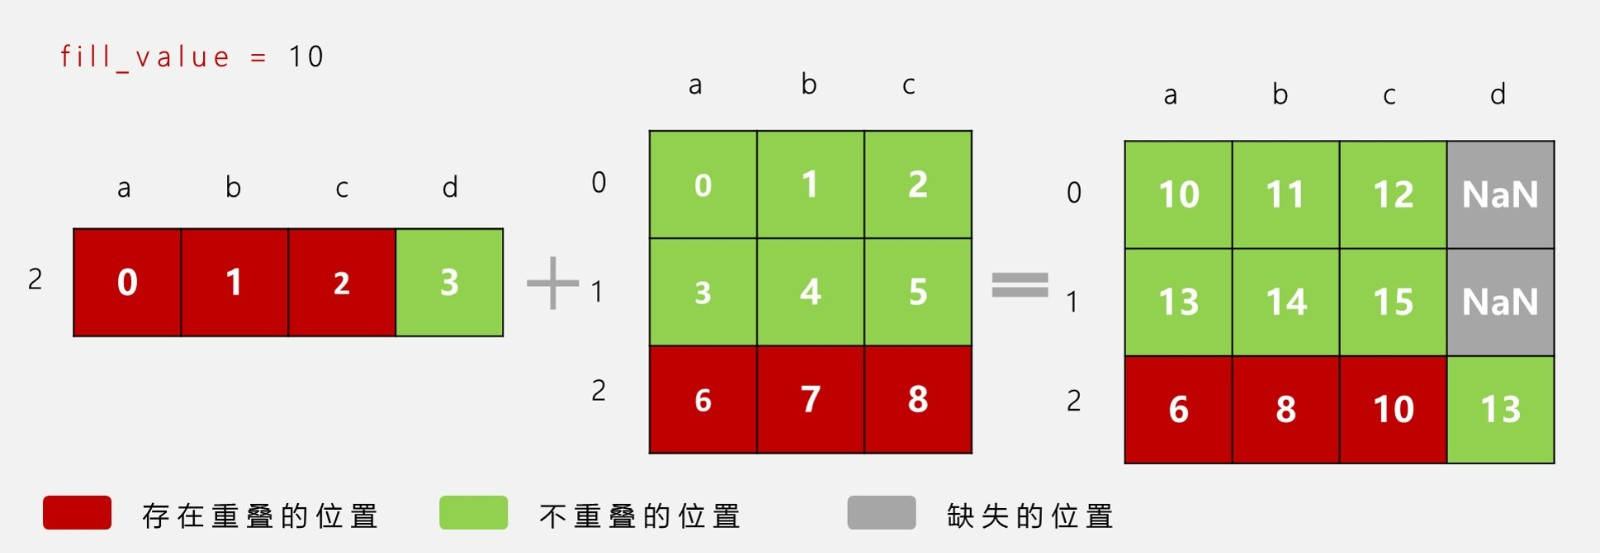

#### 逻辑运算

**基本逻辑运算**

In [60]:
# 查看收盘价不高于500的数据
df_gzmt["close"]<=500

0        True
1        True
2        True
3        True
4        True
        ...  
4089    False
4090    False
4091    False
4092    False
4093    False
Name: close, Length: 4094, dtype: bool

In [61]:
type(df_gzmt["close"]<=500)

pandas.core.series.Series

上面提到了，逻辑运算常用的场景是**按照某一条件**进行筛选，比如，我们希望看到收盘价突破780元的详单：

In [62]:
df_gzmt[df_gzmt["close"]>=780]

,day,STOCK_CODE,open,close,maximum,minimum,volume,TURNOVER,place,code,m_increase,price_mean
3896,2018-01-09,6005191,752.21,782.52,783.00,752.21,64592,5001164544,1,600519,30.31,77426.996284
3897,2018-01-10,6005191,785.00,785.71,788.88,773.48,47714,3731993152,1,600519,0.71,78215.893700
3899,2018-01-12,6005191,773.77,788.42,788.80,767.02,45988,3577281776,1,600519,14.65,77787.287466
3900,2018-01-15,6005191,793.46,785.37,799.06,779.02,52473,4136645488,1,600519,-8.09,78833.790483
3991,2018-06-04,6005191,752.35,781.97,782.90,745.88,73806,5697540352,1,600519,29.62,77196.167683
3992,2018-06-05,6005191,786.50,788.05,794.70,777.23,52630,4136578576,1,600519,1.55,78597.350865
3993,2018-06-06,6005191,788.00,785.75,800.95,782.30,48969,3870616720,1,600519,-2.25,79042.184239
3994,2018-06-07,6005191,789.98,780.97,795.55,778.90,39168,3078137472,1,600519,-9.01,78588.068627
3997,2018-06-12,6005191,778.00,799.19,803.50,776.50,55287,4385043200,1,600519,21.19,79314.182358
3998,2018-06-13,6005191,800.00,790.33,802.62,788.88,35244,2803441680,1,600519,-9.67,79543.799796


**复合运算类型**

In [63]:
# 这里注意一下括号的用法
df_gzmt[(df_gzmt["close"]>=750) & (df_gzmt["close"]<=760)]

,day,STOCK_CODE,open,close,maximum,minimum,volume,TURNOVER,place,code,m_increase,price_mean
3895,2018-01-08,6005191,735.02,752.13,756.50,735.02,52205,3899951728,1,600519,17.11,74704.563318
3903,2018-01-18,6005191,747.93,750.74,765.00,744.09,58979,4443031296,1,600519,2.81,75332.428424
3904,2018-01-19,6005191,752.90,750.18,758.90,739.02,50926,3818021984,1,600519,-2.72,74971.958999
3913,2018-02-01,6005191,767.00,757.73,767.30,752.92,50583,3846421616,1,600519,-9.27,76041.785106
3940,2018-03-19,6005191,743.97,753.48,753.99,739.00,38667,2897348544,1,600519,9.51,74930.781907
3989,2018-05-31,6005191,730.25,751.13,751.62,730.24,71853,5356222464,1,600519,20.88,74544.173020
4003,2018-06-21,6005191,765.22,759.32,778.89,758.77,39183,3013867648,1,600519,-5.90,76917.735957
4006,2018-06-26,6005191,765.31,754.80,769.88,747.00,46578,3516945440,1,600519,-10.51,75506.579072
4020,2018-07-16,6005191,752.30,754.68,764.11,751.03,32475,2454501600,1,600519,2.38,75581.265589


**在不连续条件的情况下，进行筛选,<font color=red>isin</font>可以方便地解决这个问题**

In [64]:
df_gzmt[df_gzmt["day"].isin(["2018-01-08","2018-01-18"])]

,day,STOCK_CODE,open,close,maximum,minimum,volume,TURNOVER,place,code,m_increase,price_mean
3895,2018-01-08,6005191,735.02,752.13,756.5,735.02,52205,3899951728,1,600519,17.11,74704.563318
3903,2018-01-18,6005191,747.93,750.74,765.0,744.09,58979,4443031296,1,600519,2.81,75332.428424


#### 统计运算

In [65]:
# 计算贵州茅台自上市之日起的平均股价：
df_gzmt["close"].mean(axis=0, skipna=True)

182.43522960429897

**这张表列举了常用的统计运算**

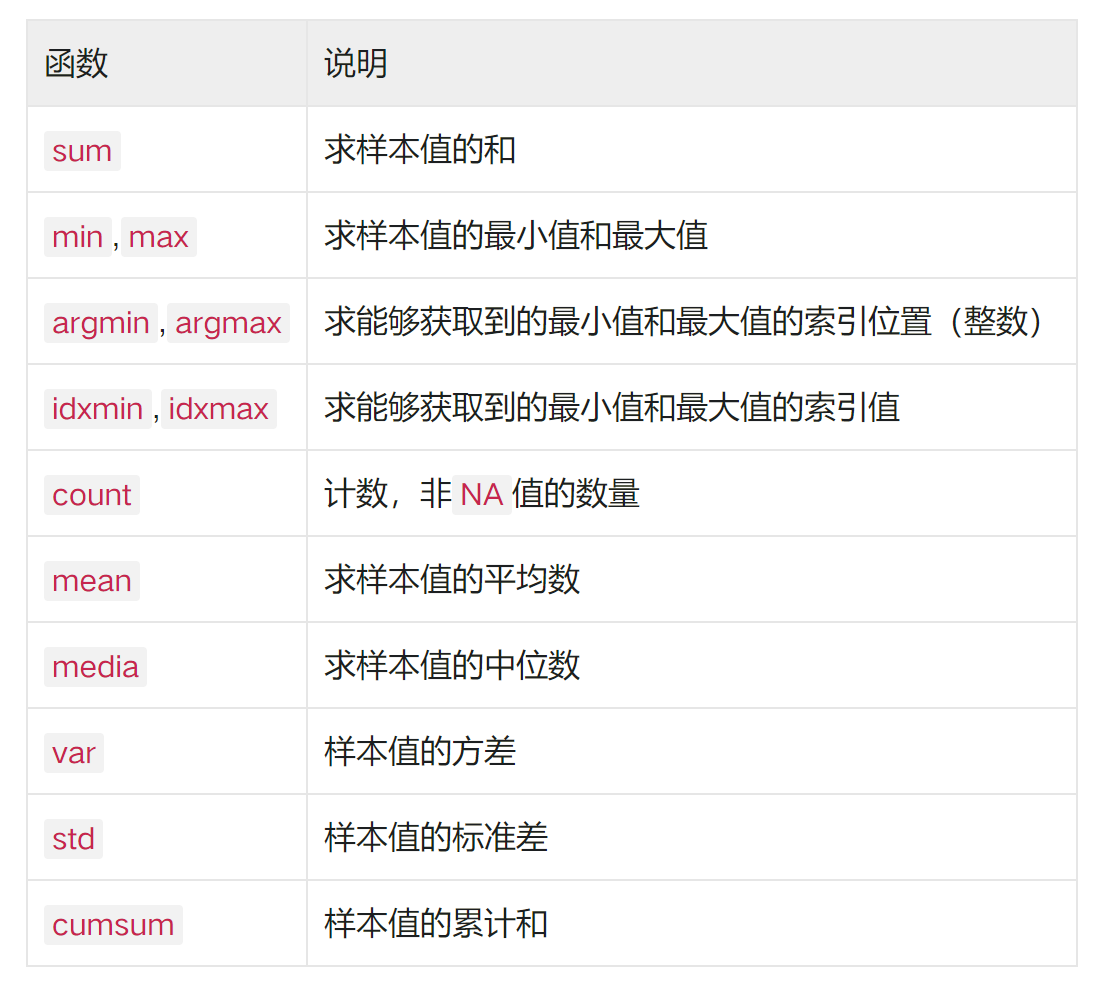

## 循环与遍历

### 不加修饰的标准循环

#### 基于索引的行循环

In [66]:
df_gzmt = pd.read_csv(file, encoding="utf-8", index_col=0)
df_gzmt

,STOCK_CODE,open,close,maximum,minimum,volume,TURNOVER
day,,,,,,,
2001-08-27,6005191,34.51,35.55,37.78,32.85,406318,1410347008
2001-08-28,6005191,34.99,36.86,37.00,34.61,129647,463463008
2001-08-29,6005191,36.98,36.38,37.00,36.10,53252,194689000
2001-08-30,6005191,36.28,37.10,37.51,36.00,48013,177558000
2001-08-31,6005191,37.15,37.01,37.62,36.80,23231,86231000
...,...,...,...,...,...,...,...
2018-10-29,6005191,549.09,549.09,549.09,549.09,49076,2694714080
2018-10-30,6005191,510.00,524.00,543.00,509.02,204397,10663392512
2018-10-31,6005191,527.00,548.90,555.00,522.00,96885,5239853056


In [67]:
df_gzmt.index

Index(['2001-08-27', '2001-08-28', '2001-08-29', '2001-08-30', '2001-08-31',
       '2001-09-03', '2001-09-04', '2001-09-05', '2001-09-06', '2001-09-07',
       ...
       '2018-10-22', '2018-10-23', '2018-10-24', '2018-10-25', '2018-10-26',
       '2018-10-29', '2018-10-30', '2018-10-31', '2018-11-01', '2018-11-02'],
      dtype='object', name='day', length=4094)

In [68]:
df_gzmt.columns

Index(['STOCK_CODE', 'open', 'close', 'maximum', 'minimum', 'volume',
       'TURNOVER'],
      dtype='object')

In [69]:
df_gzmt.index.name

'day'

##### 通过索引名字进行遍历

In [70]:
# 这里仅做演示，程序里增加了break，只打印第一轮循环
for day in df_gzmt.index:
    row = df_gzmt.loc[day]
    print(row)
    print(f'{day}的贵州茅台收盘价是{row["close"]}元')
    break

STOCK_CODE    6.005191e+06
open          3.451000e+01
close         3.555000e+01
maximum       3.778000e+01
minimum       3.285000e+01
volume        4.063180e+05
TURNOVER      1.410347e+09
Name: 2001-08-27, dtype: float64
2001-08-27的贵州茅台收盘价是35.55元


##### 通过索引位置进行遍历

In [71]:
num = df_gzmt.shape[0]
num

4094

In [72]:
for i in range(num):
    row = df_gzmt.iloc[i]
    print(row)
    break

STOCK_CODE    6.005191e+06
open          3.451000e+01
close         3.555000e+01
maximum       3.778000e+01
minimum       3.285000e+01
volume        4.063180e+05
TURNOVER      1.410347e+09
Name: 2001-08-27, dtype: float64


#### 基于索引的列循环

### 基于内置方法的快速循环

内置的 **itertuples()和iterrows()**等方法 ，是类似于迭代器的yield用法，一次产生一行的生成器。

#### iterrows()循环

In [73]:
# iterrows用法示例
for index,row in df_gzmt.iterrows():
    print("index = " + index)
    print("row value is ", row, sep="\n")
    print(type(row))
    break

index = 2001-08-27
row value is 
STOCK_CODE    6.005191e+06
open          3.451000e+01
close         3.555000e+01
maximum       3.778000e+01
minimum       3.285000e+01
volume        4.063180e+05
TURNOVER      1.410347e+09
Name: 2001-08-27, dtype: float64
<class 'pandas.core.series.Series'>


In [74]:
for index,row in df_gzmt.iterrows():
    print(row["close"])
    break

35.55


#### itertuples()循环

print加逗号,输出在一行  
itertuples()返回的是一个pandas.core.frame.Pandas类型。并且普遍认为**itertuples()比 iterrows()的速度要快一些**。

In [75]:
for sub_tuple in df_gzmt.itertuples():
    print(sub_tuple,type(sub_tuple))
    print("Index = ",sub_tuple.Index)
    print("STOCK_CODE = ",sub_tuple.STOCK_CODE)
    print("open = ",getattr(sub_tuple,"open"))
    break

Pandas(Index='2001-08-27', STOCK_CODE=6005191, open=34.51, close=35.55, maximum=37.78, minimum=32.85, volume=406318, TURNOVER=1410347008) <class 'pandas.core.frame.Pandas'>
Index =  2001-08-27
STOCK_CODE =  6005191
open =  34.51


#### iteritems()

In [76]:
for column, row in df_gzmt.iteritems():
    print("第一列的名字 :", column)
    print("第一列的内容 :", row)
    break

第一列的名字 : STOCK_CODE
第一列的内容 : day
2001-08-27    6005191
2001-08-28    6005191
2001-08-29    6005191
2001-08-30    6005191
2001-08-31    6005191
               ...   
2018-10-29    6005191
2018-10-30    6005191
2018-10-31    6005191
2018-11-01    6005191
2018-11-02    6005191
Name: STOCK_CODE, Length: 4094, dtype: int64


### 手动实现累计和的运算

In [77]:
# %matplotlib具体作用是当你调用matplotlib.pyplot的绘图函数plot()进行绘图的时候，或者生成一个figure画布的时候，
# 可以直接在你的python console里面生成图像
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [78]:
dataframe = pd.read_csv(file, encoding="utf-8", index_col=0)
dataframe

,STOCK_CODE,open,close,maximum,minimum,volume,TURNOVER
day,,,,,,,
2001-08-27,6005191,34.51,35.55,37.78,32.85,406318,1410347008
2001-08-28,6005191,34.99,36.86,37.00,34.61,129647,463463008
2001-08-29,6005191,36.98,36.38,37.00,36.10,53252,194689000
2001-08-30,6005191,36.28,37.10,37.51,36.00,48013,177558000
2001-08-31,6005191,37.15,37.01,37.62,36.80,23231,86231000
...,...,...,...,...,...,...,...
2018-10-29,6005191,549.09,549.09,549.09,549.09,49076,2694714080
2018-10-30,6005191,510.00,524.00,543.00,509.02,204397,10663392512
2018-10-31,6005191,527.00,548.90,555.00,522.00,96885,5239853056


In [79]:
# 第一步：逐行计算累积值
cum_sum = []
_last_cum = 0
for index, row in dataframe.iterrows():
    temp = row["TURNOVER"] + _last_cum
    cum_sum.append(temp)
    _last_cum = temp

In [80]:
dataframe["Turnover_CUMSUM"] = cum_sum
dataframe

,STOCK_CODE,open,close,maximum,minimum,volume,TURNOVER,Turnover_CUMSUM
day,,,,,,,,
2001-08-27,6005191,34.51,35.55,37.78,32.85,406318,1410347008,1.410347e+09
2001-08-28,6005191,34.99,36.86,37.00,34.61,129647,463463008,1.873810e+09
2001-08-29,6005191,36.98,36.38,37.00,36.10,53252,194689000,2.068499e+09
2001-08-30,6005191,36.28,37.10,37.51,36.00,48013,177558000,2.246057e+09
2001-08-31,6005191,37.15,37.01,37.62,36.80,23231,86231000,2.332288e+09
...,...,...,...,...,...,...,...,...
2018-10-29,6005191,549.09,549.09,549.09,549.09,49076,2694714080,2.629469e+12
2018-10-30,6005191,510.00,524.00,543.00,509.02,204397,10663392512,2.640133e+12
2018-10-31,6005191,527.00,548.90,555.00,522.00,96885,5239853056,2.645373e+12


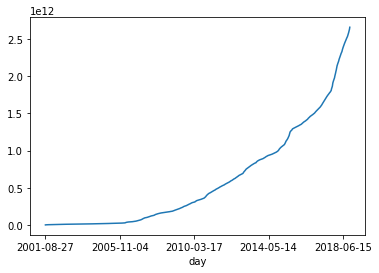

In [81]:
dataframe["Turnover_CUMSUM"].plot()

## Pandas与匿名函数

### Python与匿名函数

In [82]:
data = {"Jack": 182, "Tom":176, "Jerry":179, "Emily":165, "Sawyer":170, "Chris":160}

字典**items()**方法,返回可遍历的(键, 值) 元组数组

In [83]:
data.items()

dict_items([('Jack', 182), ('Tom', 176), ('Jerry', 179), ('Emily', 165), ('Sawyer', 170), ('Chris', 160)])

**sorted()**方法,key=lambda x: x[1] 为对前面的对象中的第二维数据（即value）的值进行排序。 key=lambda  变量：变量[维数]

In [84]:
# 按照字典的value值，逆序排序
data_rev = sorted(data.items(), key=lambda x:x[1], reverse=True)
dict(data_rev)

{'Jack': 182,
 'Jerry': 179,
 'Tom': 176,
 'Sawyer': 170,
 'Emily': 165,
 'Chris': 160}

In [85]:
# 按照字典的key值，自然顺序排序
data_nrev = sorted(data.items(), key=lambda x:x[0], reverse=False)
dict(data_nrev)

{'Chris': 160,
 'Emily': 165,
 'Jack': 182,
 'Jerry': 179,
 'Sawyer': 170,
 'Tom': 176}

所谓的**函数式编程**，是指一种高度抽象的编程范式，即可以把函数作为参数传入，而能够接收函数作为参数传入的函数我们称之为高阶函数。常见的高阶函数有<font color=red>map、reduce和filter</font>等。  
**map()**----第一个参数 function 以参数序列中的每一个元素调用 function 函数，返回包含每次 function 函数返回值的新列表。   
**reduce()**----函数会对参数序列中元素进行累积。函数将一个数据集合（链表，元组等）中的所有数据进行下列操作：用传给 reduce 中的函数 function（有两个参数）先对集合中的第 1、2 个元素进行操作，得到的结果再与第三个数据用 function 函数运算，最后得到一个结果。    
**filter()**----函数用于过滤序列，过滤掉不符合条件的元素，返回由符合条件元素组成的新列表。
该接收两个参数，第一个为函数，第二个为序列，序列的每个元素作为参数传递给函数进行判断，然后返回 True 或 False，最后将返回 True 的元素放到新列表中。

In [86]:
names = ["Larissa", "ivy", "LUCY", "aBBY", "martion", "allen"]

In [87]:
list(map(lambda x: x[0].upper()+x[1:].lower(), names))

['Larissa', 'Ivy', 'Lucy', 'Abby', 'Martion', 'Allen']

### Pandas与函数

#### map()函数

In [88]:
file = r"C:\Users\16526\Desktop\电网项目\dataset\chapter 3\3-5 GDP.csv"

In [89]:
df_GDP = pd.read_csv(file, header=0)

In [90]:
df_GDP

,Country Name,longitude,latitude,1960,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,United Kingdom,-0.07858,51.50476,7.232805e+10,7.669436e+10,8.060194e+10,8.544377e+10,9.338760e+10,1.010000e+11,1.070000e+11,...,2390000000000,2450000000000,2630000000000,2680000000000,2750000000000,3030000000000,2900000000000,2660000000000,2640000000000,2830000000000
1,United States,-77.04026,38.85169,5.430000e+11,5.630000e+11,6.050000e+11,6.390000e+11,6.860000e+11,7.440000e+11,8.150000e+11,...,14400000000000,15000000000000,15500000000000,16200000000000,16800000000000,17500000000000,18200000000000,18700000000000,19500000000000,20500000000000
2,Russian Federation,37.59411,55.75306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1220000000000,1520000000000,2050000000000,2210000000000,2300000000000,2060000000000,1360000000000,1280000000000,1580000000000,1660000000000
3,France,2.29363,48.87372,6.265147e+10,6.834674e+10,7.631378e+10,8.555111e+10,9.490659e+10,1.020000e+11,1.110000e+11,...,2690000000000,2640000000000,2860000000000,2680000000000,2810000000000,2850000000000,2440000000000,2470000000000,2590000000000,2780000000000
4,China,116.39213,39.90071,5.971647e+10,5.005687e+10,4.720936e+10,5.070680e+10,5.970834e+10,7.043627e+10,7.672029e+10,...,5100000000000,6090000000000,7550000000000,8530000000000,9570000000000,10400000000000,11000000000000,11100000000000,12100000000000,13600000000000


In [91]:
# 英文格式转化成中文
country_dict = {
    "United Kingdom": "英国", 
    "United States": "美国", 
    "Russian Federation": "俄罗斯", 
    "France": "法国", 
    "China": "中国" 
}

**Series.map(self, arg, na_action=None)**   
参数类型为 dict--------Series.map({'cat': 'kitten', 'dog': 'puppy'})  
参数类型为 function----Series.map('I am a {}'.format)   
若不想对NaN值使用参数中的 function ， 参数 na_tion=‘ignore

In [92]:
df_GDP["国家"] = df_GDP["Country Name"].map(country_dict)
df_GDP["国家"]

0     英国
1     美国
2    俄罗斯
3     法国
4     中国
Name: 国家, dtype: object

#### apply()函数

##### 函数与匿名函数

In [93]:
# 定义函数:将数字类型美元计价GDP的变量转换为以万亿人民币为单位计价的数据
def dollar_to_rmb(x):
    if np.isnan(x):
        return np.nan
    else:
        _value = x / 1000000000000 * 6.8918
        return "%.2f万亿人民币"%(_value)
# 利用apply，将函数dollar_to_rmb的功能，作用到"2018"列，进行列方向的计算
df_GDP["2018"].apply(dollar_to_rmb)

0     19.50万亿人民币
1    141.28万亿人民币
2     11.44万亿人民币
3     19.16万亿人民币
4     93.73万亿人民币
Name: 2018, dtype: object

In [94]:
df_GDP["2018"].apply(
    lambda x: x if np.isnan(x) else "%.2f万亿人民币"%(x / 1000000000000 * 6.8918))

0     19.50万亿人民币
1    141.28万亿人民币
2     11.44万亿人民币
3     19.16万亿人民币
4     93.73万亿人民币
Name: 2018, dtype: object

##### apply()函数的运算方向

In [95]:
# 定义了一个计算GDP增长率的匿名函数
df_GDP[["2017", "2018"]].apply(
    lambda x: "%.2f"%((x["2018"]-x["2017"])/x["2017"]*100)+"%", axis=1)

0     7.20%
1     5.13%
2     5.06%
3     7.34%
4    12.40%
dtype: object

##### applymap()函数

In [96]:
df_GDP.loc[:, "1960":"2018"].applymap(
    lambda x: x if np.isnan(x) else "%.2f万亿人民币"%(x / 1000000000000 * 6.8918))

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,0.50万亿人民币,0.53万亿人民币,0.56万亿人民币,0.59万亿人民币,0.64万亿人民币,0.70万亿人民币,0.74万亿人民币,0.76万亿人民币,0.72万亿人民币,0.78万亿人民币,...,16.47万亿人民币,16.88万亿人民币,18.13万亿人民币,18.47万亿人民币,18.95万亿人民币,20.88万亿人民币,19.99万亿人民币,18.33万亿人民币,18.19万亿人民币,19.50万亿人民币
1,3.74万亿人民币,3.88万亿人民币,4.17万亿人民币,4.40万亿人民币,4.73万亿人民币,5.13万亿人民币,5.62万亿人民币,5.94万亿人民币,6.50万亿人民币,7.03万亿人民币,...,99.24万亿人民币,103.38万亿人民币,106.82万亿人民币,111.65万亿人民币,115.78万亿人民币,120.61万亿人民币,125.43万亿人民币,128.88万亿人民币,134.39万亿人民币,141.28万亿人民币
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.41万亿人民币,10.48万亿人民币,14.13万亿人民币,15.23万亿人民币,15.85万亿人民币,14.20万亿人民币,9.37万亿人民币,8.82万亿人民币,10.89万亿人民币,11.44万亿人民币
3,0.43万亿人民币,0.47万亿人民币,0.53万亿人民币,0.59万亿人民币,0.65万亿人民币,0.70万亿人民币,0.76万亿人民币,0.82万亿人民币,0.90万亿人民币,0.97万亿人民币,...,18.54万亿人民币,18.19万亿人民币,19.71万亿人民币,18.47万亿人民币,19.37万亿人民币,19.64万亿人民币,16.82万亿人民币,17.02万亿人民币,17.85万亿人民币,19.16万亿人民币
4,0.41万亿人民币,0.34万亿人民币,0.33万亿人民币,0.35万亿人民币,0.41万亿人民币,0.49万亿人民币,0.53万亿人民币,0.50万亿人民币,0.49万亿人民币,0.55万亿人民币,...,35.15万亿人民币,41.97万亿人民币,52.03万亿人民币,58.79万亿人民币,65.95万亿人民币,71.67万亿人民币,75.81万亿人民币,76.50万亿人民币,83.39万亿人民币,93.73万亿人民币


##### 清洗与效率

## Pandas:数据清洗常用方法

In [99]:
file = r"C:\Users\16526\Desktop\电网项目\dataset\chapter 3\3-6 jobs_51_info.csv"
jobs = pd.read_csv(file, header=0)
jobs.head()

,job,company,city,salary_min,salary_max
0,金融数据分析师/助理,华壹信融投资管理（北京）有限责任...,北京,8333.33,12500.0
1,a（0经验可培养）金融数据分析师/助理,深圳市中创荣投资有限公司,深圳,8000.00,10000.0
2,初级运营数据分析专员 助理,知才（上海）信息技术有限公司,上海,6000.00,8000.0
3,销售数据分析,上海品星互联网信息技术有限公司,北京,5000.00,9000.0
4,数据分析经理,美菜网,上海,13000.00,17000.0


In [103]:
# 字段信息总览
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66766 entries, 0 to 66765
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   job         66766 non-null  object 
 1   company     66766 non-null  object 
 2   city        64290 non-null  object 
 3   salary_min  65457 non-null  float64
 4   salary_max  65462 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [104]:
# 查看数据包含哪些城市
jobs["city"].unique()

array(['北京', '深圳', '上海', '武汉', '广州', '南京', '西安', '杭州', '成都', '苏州', nan],
      dtype=object)

### 筛选与过滤

**isin()、isnull()、notnull()**

In [107]:
# skipna : 布尔值,默认为True.表示跳过NaN值.如果整行/列都是NaN,那么结果也就是NaN
jobs[jobs["city"] == "北京"]["salary_min"].mean(skipna=True)

10329.230455194938

### 计算唯一值

**value_counts()**

In [111]:
jobs["city"].value_counts()

广州    15634
深圳    14448
上海    13027
北京     5093
杭州     4615
武汉     3682
成都     2811
南京     2165
苏州     1486
西安     1329
Name: city, dtype: int64

### 空值处理

#### 丢弃空值

In [114]:
jobs.shape

(66766, 5)

**dropna函数**

In [118]:
# 只要这一行存在空值，则删除改行；axis=0用来表征是删除行（运算方向为列方向）
# 同步计算删除结果的维度，为63017行5列。
jobs.dropna(axis=0).shape

(63017, 5)

In [120]:
# 整行均为空值，删除；否则保留
jobs.dropna(how="all", axis=0).shape

(66766, 5)

In [122]:
# 删除指定列("city","salary_min")中包含缺失值的行
jobs.dropna(subset=["city"]).shape

(64290, 5)

#### 空值填充